<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-1/blob/main/1.d.%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">
 این داده ها به قیمتهای مسکن در شهر بوستون اشاره دارند. دیتاست ارائه شده شامل ۵۰۶ نمونه است، که ۱۳ ویژگی دارند.

توضیحات مربوط به این دیتاست در جدول زیر آمده است:
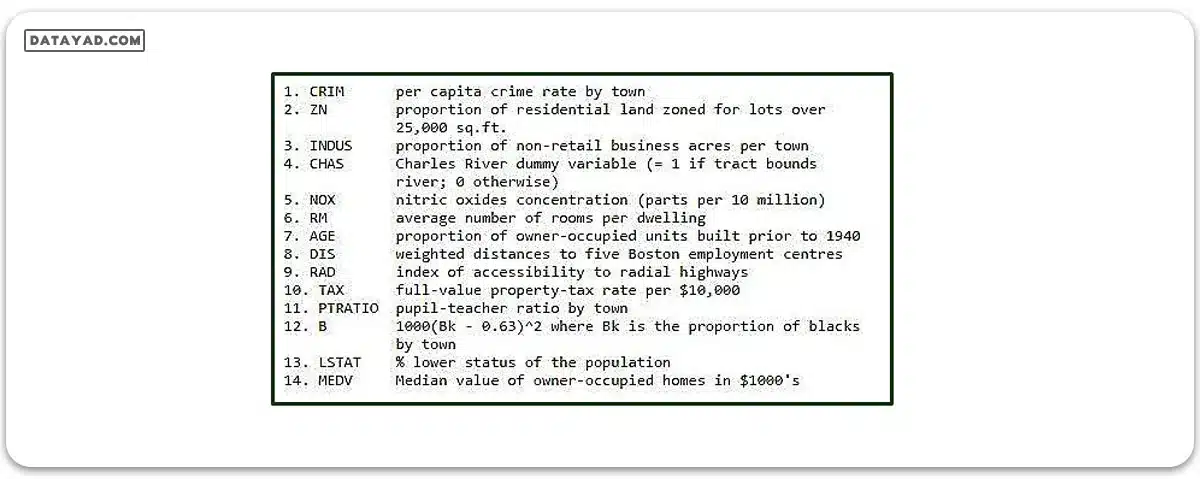

CRIM - نرخ جرم به ازای هر نفر در هر شهر

ZN - درصد زمین‌های مسکونی که برای قطعه‌های بزرگ‌تر از ۲۵٬۰۰۰ فوت مربع زون‌بندی شده‌اند

INDUS - نسبت زمین‌های غیرتجاری (صنعتی) در هر شهر

CHAS - متغیر ساختگی رودخانه چارلز (۱ اگر زمین در کنار رودخانه باشد، در غیر این صورت ۰)

NOX - غلظت اکسیدهای نیتروژن (واحد: قسمت در ۱۰ میلیون)

RM - میانگین تعداد اتاق‌ها در هر واحد مسکونی

AGE - درصد واحدهای مسکونی که قبل از سال ۱۹۴۰ ساخته شده‌اند

DIS - فاصله‌های وزنی تا پنج مرکز اصلی اشتغال در بوستون

RAD - شاخص دسترسی به بزرگراه‌های شعاعی

TAX - نرخ مالیات بر ملک کامل به ازای هر ۱۰٬۰۰۰ دلار

PTRATIO - نسبت تعداد دانش‌آموز به معلم در هر شهر

B - مقدار محاسبه شده با فرمول:
1000
×
(
𝐵
𝑘
−
0.63
)
2
1000×(Bk−0.63)
2
  که Bk درصد سیاه‌پوستان در شهر است

LSTAT - درصد افراد با وضعیت اجتماعی-اقتصادی پایین

MEDV - ارزش میانه خانه‌های مالک‌نشین (واحد: هزار دلار)


In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as met
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
boston = fetch_california_housing()
x = boston.data
print(x)
y = boston.target
print(y)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [3]:
df = pd.DataFrame(x, columns=boston.feature_names)

In [4]:
df ['Price'] = y
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [6]:
xtrain.shape

(14448, 8)

In [7]:
xtest.shape

(6192, 8)

In [8]:
ytrain.shape

(14448,)

In [9]:
ytest.shape

(6192,)

In [10]:
model = LinearRegression()
model.fit(xtrain , ytrain)
ypred = model.predict(xtest)
ypred.shape

(6192,)

Mean Squared Error (MSE)= 0.5305677824766757


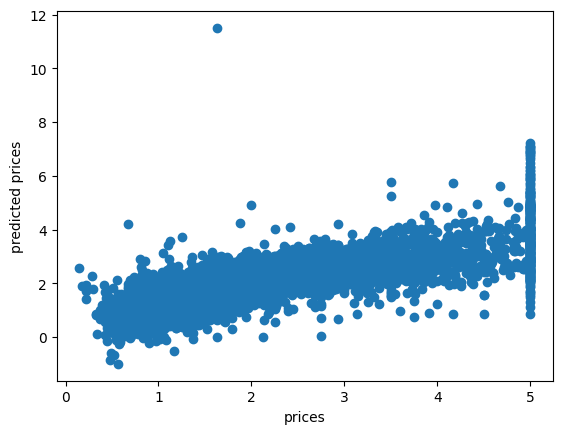

In [11]:
#نمودار پراکنده‌ای خواهی دید که اگر نقاط به صورت یک خط مورب باشند، مدل عملکرد خوبی دارد.
plt.scatter(ytest,ypred)
plt.plot()
plt.xlabel('prices')
plt.ylabel('predicted prices')
print("Mean Squared Error (MSE)=",met.mean_squared_error(ytest,ypred))